**Datacamp Project**

![Futuristic electric car charging](ev_charging.png)

The US Government's Alternative Fuels Data Center collects records of electric vehicle (EV) charging infrastructure, including charging ports and station locations, as well as sales of electric vehicles. With the EV market rapidly evolving, understanding trends in charging facilities and sales is essential to inform strategic planning.

As a data scientist working for a leading EV charging network operator, you recognize the potential in this data and start wrangling and visualizing the aggregated yearly data. 

This yearly data captured in December of each year encompasses a record of EV charging port installations and station localities spanning roughly ten years, capturing both public and private charging environments. 
___

### The Data
&nbsp;

`private_ev_charging.csv`

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection |
| `private_ports`| The number of available charging ports owned by private companies in a given year  |
| `private_station_locations`   | The number of privately owned station locations for EV charging

___

`public_ev_charging.csv`
 
| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `year` |  Year of data collection  |
| `public_ports`| The number of available charging ports under public ownership in a given year  |
| `public_station_locations`   | The number of publicly owned station locations for EV charging

___

The sales information is available for each model and year in the `ev_sales.csv` file:

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `Vehicle` |  Electric vehicle model |
| `year`| Year of data collection |
| `sales`   | The number of vehicles sold in the US

In [26]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Start coding here

#1. Loading data
private = pd.read_csv("private_ev_charging.csv")
public = pd.read_csv("public_ev_charging.csv")
sales = pd.read_csv("ev_sales.csv")
private.head()

,year,private_ports,private_station_locations
0,2014,3695,1825
1,2015,4150,1962
2,2016,5763,2331
3,2017,6048,2370
4,2018,6812,2489


In [28]:
#2. Joining private and public dataframes

#Performing outer join to keep rows with complete information
df_joined = private.merge(public, on='year', how='outer', indicator=True)
df_temp = df_joined[df_joined['_merge'] == 'both']

#Dropping irrelevant columns (_merge)
df_temp = df_temp.drop(columns=['_merge'])

In [29]:
#3. Join aggregated sales dataframe

#Groupping by year and adding sales
ev_total_sales = sales.groupby('year')['sales'].sum().reset_index()
ev_total_sales

#Inspect data and save variable
ev_total_sales[ev_total_sales['year'] == 2018]
ev_sales_2018 = 361315
print(ev_sales_2018)

#Joining sales dataframe
df_complete = df_temp.merge(sales, on='year', how='left')

#Dropping rows with null values
df_complete = df_complete.dropna(subset='sales')

361315


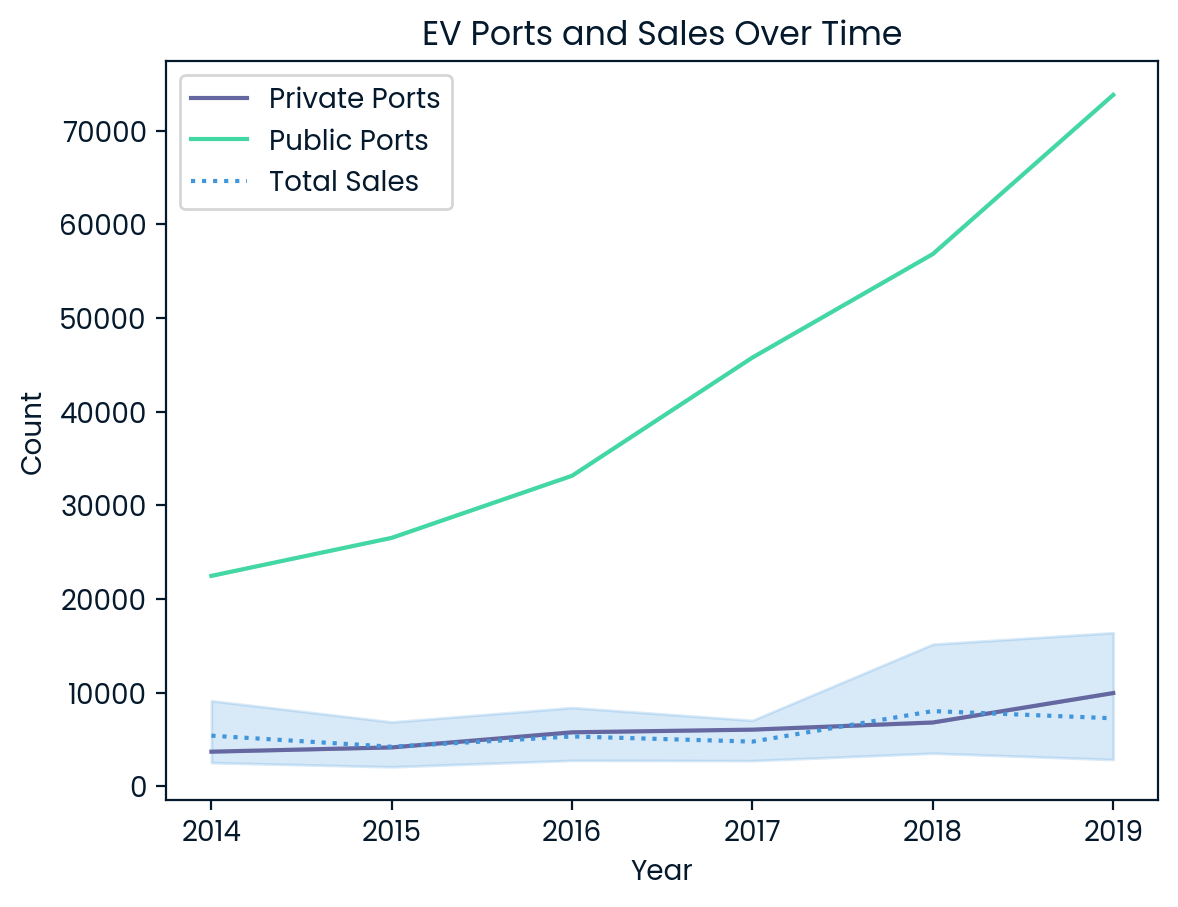

The plot shows that the trend for vehicle sales and number of private and public ports is the same


In [30]:
#4. Creating graph with multiple lines

#Creating figure and axis object
fig, ax = plt.subplots()

#Plotting each line
sns.lineplot(data=df_complete, x='year', y='private_ports', label='Private Ports')
sns.lineplot(data=df_complete, x='year', y='public_ports', label='Public Ports')
sns.lineplot(data=df_complete, x='year', y='sales', label='Total Sales', linestyle=':')

#Adding titles and labels
ax.set_title('EV Ports and Sales Over Time')
ax.set(xlabel='Year', ylabel='Count')

#Showing legend
ax.legend(loc='upper left')

#Showing plot
plt.show()

#Did vehicle sales and number of private and public ports show the same trend?
trend = "same"
print("The plot shows that the trend for vehicle sales and number of private and public ports is the " + trend)